In [190]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from math import e

Ejercicio 19

# a.

In [191]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [192]:
def GetLaguerre(n,x):
    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly =  ((2*n-1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
   
    return sym.expand(poly,x)

In [193]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [194]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [195]:
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [196]:
def GetAllRootsGLag(n):

    xn = np.linspace(0, n + np.sqrt(n)*(n-1),100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [197]:
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)
    
    Laguerre = GetLaguerre(n+1, x)
    
    Lpoly = sym.lambdify([x],Laguerre,'numpy')
    Weights = Roots/((n+1)**(2) * (Lpoly(Roots))**2)
    
    return Weights, Roots

In [198]:
f= lambda x: (e**(x)*x**(3))/(e**(x)-1)

In [199]:
pesos = GetWeightsGLag(3)
raices = GetAllRootsGLag(3)

In [200]:
I=0
for i in range(3):

    I += pesos[i]*f(raices[i])
    
I

IndexError: tuple index out of range

In [ ]:
(np.pi**(4)/15)-I

0.012809230839073926

# b.

In [ ]:
def integral(N):
    Weights, Roots = GetWeightsGLag(N) 
    
    
    I=0
    for i in range(N):
        I += Weights[i]*f(Roots[i])
    
    return I

In [ ]:
def error_r(N):
    return integral(N)/(np.pi**(4)/15)

In [ ]:
error_r(3)

0.9980275099526487

In [ ]:
n=np.linspace(2,10, 9, dtype=int)

In [ ]:
n

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
error =np.array([])

for i in n:
    error = np.append(error, error_r(i))

IndexError: index 7 is out of bounds for axis 0 with size 7

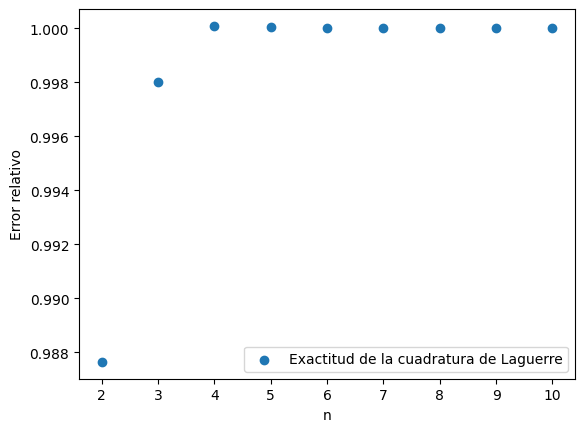

In [ ]:
plt.scatter(n, error, label="Exactitud de la cuadratura de Laguerre")
plt.xlabel('n')
plt.ylabel('Error relativo')
plt.legend()